# Kennedy Fletcher

## Research question/interests

I want to look at what country has the most points of all time, as well as what driver has had the best season of all time. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables

In [2]:
print(pd.__version__)

1.3.2


In [45]:
f1data = pd.read_csv("../f1data.csv")

In [46]:
f1data

,Pos,Driver,Nationality,Car,PTS,Year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950
...,...,...,...,...,...,...
1568,17,Kevin Magnussen MAG,DEN,Haas Ferrari,1.0,2020
1569,18,Kimi RÃ¤ikkÃ¶nen RAI,FIN,Alfa Romeo Racing Ferrari,0.0,2020
1570,19,Nicholas Latifi LAT,CAN,Williams Mercedes,0.0,2020
1571,20,George Russell RUS,GBR,Williams Mercedes,0.0,2020


In [6]:
## Milestone 3 Task 1 (EDA)

In [7]:
f1data.shape

(1573, 6)

In [8]:
## so there are 1573 rows and 6 columns

In [9]:
f1data.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS', 'Year'], dtype='object')

In [10]:
f1data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PTS,Year
count,1573.000000,1573.000000
mean,27.207883,1985.148760
std,52.585197,20.744311
min,0.000000,1950.000000
25%,3.000000,1967.000000
50%,8.000000,1985.000000
75%,28.000000,2004.000000
max,413.000000,2020.000000


<AxesSubplot:>

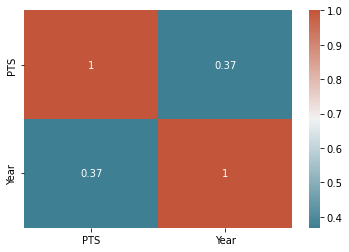

In [8]:
# calculate correlation matrix
corr = f1data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

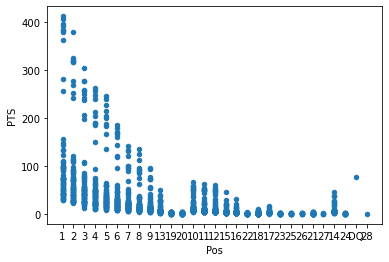

In [11]:
f1data.plot(kind='scatter', x='Pos', y='PTS')

<AxesSubplot:ylabel='Frequency'>

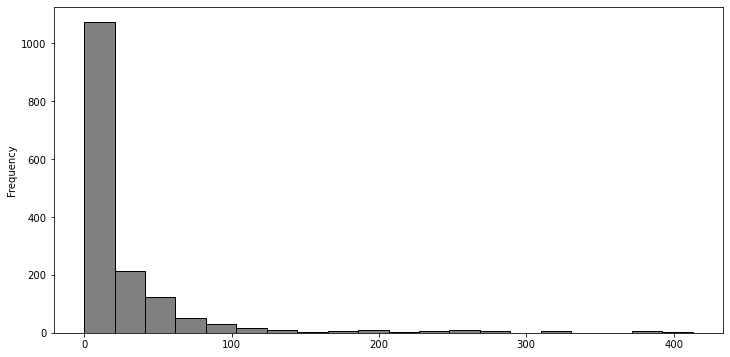

In [12]:
f1data['PTS'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:xlabel='Driver', ylabel='PTS'>

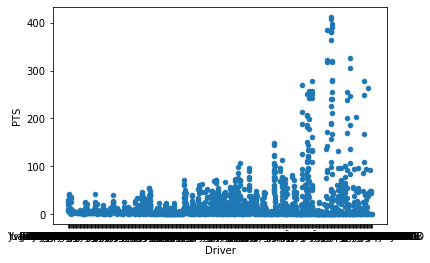

In [13]:
f1data.plot(kind='scatter', x='Driver', y='PTS')

<AxesSubplot:xlabel='Nationality', ylabel='PTS'>

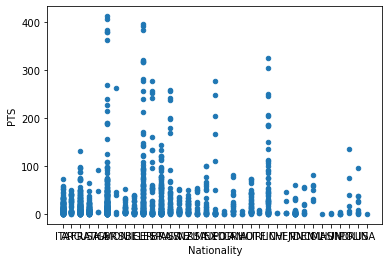

In [15]:
f1data.plot(kind='scatter', x='Nationality', y='PTS')

In [16]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

In [17]:
top5(f1data)

Top 5 unique values of Pos
  Pos  Count
0  18     95
1  15     79
2  13     79
3  12     76
4   6     75
 
Top 5 unique values of Driver
                   Driver  Count
0  Rubens Barrichello BAR     19
1  Michael Schumacher MSC     19
2    Kimi RÃ¤ikkÃ¶nen RAI     18
3       Jenson Button BUT     17
4    Riccardo Patrese PAT     16
 
Top 5 unique values of Nationality
  Nationality  Count
0         GBR    285
1         ITA    192
2         FRA    177
3         USA    133
4         GER    130
 
Top 5 unique values of Car
                Car  Count
0           Ferrari    197
1           Renault     48
2               BRM     44
3        Lotus Ford     43
4  McLaren Mercedes     43
 


In [ ]:
# task 2

In [76]:
f1data

,Pos,Driver,Nationality,Car,PTS,Year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950
...,...,...,...,...,...,...
1568,17,Kevin Magnussen MAG,DEN,Haas Ferrari,1.0,2020
1569,18,Kimi RÃ¤ikkÃ¶nen RAI,FIN,Alfa Romeo Racing Ferrari,0.0,2020
1570,19,Nicholas Latifi LAT,CAN,Williams Mercedes,0.0,2020
1571,20,George Russell RUS,GBR,Williams Mercedes,0.0,2020


In [90]:
df = (   
    pd.DataFrame(f1data.data,columns=data.feature_names)
    .rename(columns={'Pos':'Positiom','Car': 'Team'} inplace=True)
    .dropna()
    .reset_index(drop=True)
)

df

SyntaxError: invalid syntax (<ipython-input-90-ec2378296d51>, line 3)

In [73]:
def checktype(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
    
    def replace_null_values(df):        
        # replace field that's entirely space (or empty) with NaN
        df = df.replace(r'^\s*$', np.nan, regex=True)

        print("Preview of data:")
        display(df.head(3))

        print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
        print(df.info())

        if f1data.isnull().any(axis=None):
            print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
            print(df[df.isnull().any(axis=1)])
            plt.show()
        
    def check_duplicate_entries(df):
        # generate count statistics of duplicate entries
        if len(df[df.duplicated()]) > 0:
            print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
            display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
        else:
            print("\nNo duplicated entries found")
   
    return (df)

In [74]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv(url_or_path_to_csv_file)
      )

    df2 = df1.rename(columns={"OldName":"NewName"})
    return df1 